# TMDB Movie Dataset: Text Preprocessing & EDA

In this notebook, I built my own dataset by fetching ≈10,000 movies from TMDB API.
I applied NLP preprocessing, checked data quality, and did a quick EDA to understand the data.


In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('movies.csv')

## Checking for URLs and HTML Tags

Before further analysis, it’s important to check whether the original movie descriptions contain unwanted elements like URLs or HTML tags.  
These elements usually don't add value for NLP tasks and can introduce noise.

In this step, I scanned the descriptions to see how many contain:
- URLs (e.g., starting with `http` or `www`)
- HTML tags (e.g., `<br>`, `<p>`)

This helps decide whether additional cleaning steps are necessary.


In [ ]:
import re
url_pattern = r'https\S+|www\S+|https\S+'
html_pattern = r'<.*?>'
df['urls'] = df['description'].apply(lambda x: re.findall(url_pattern, str(x)))
df['html'] = df['description'].apply(lambda x: re.findall(html_pattern, str(x)))

df[df['urls'].apply(len)>0]
df[df['html'].apply(len)>0]

## Text Preprocessing

To prepare the movie descriptions for NLP tasks, I applied standard text preprocessing steps:

- **Lowercasing**: Converts all text to lowercase to ensure consistency (e.g., "Hero" → "hero").
- **Removing punctuation**: Removes symbols and punctuation marks.
- **Tokenization**: Splits text into individual words (tokens).
- **Stopword removal**: Removes common words (e.g., "the", "is", "and") that add little meaning.
- **Lemmatization**: Converts words to their base form (e.g., "running" → "run") to reduce dimensionality.

These steps help clean the text and make it more suitable for tasks like feature extraction, text classification, and topic modeling.


In [13]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    token = word_tokenize(text)
    cleaned_tokens = [
        lemmatizer.lemmatize(word, pos='v') for word in token if word not in stopwords
    ]
    return ' '.join(cleaned_tokens)


In [14]:
df['clean_description'] = df['description'].apply(preprocess)

## Before vs After Text Cleaning

Here are a few examples comparing the original movie descriptions with the cleaned text after:
- Lowercasing
- Removing punctuation
- Removing stopwords
- Lemmatization

This helps see what the preprocessing step actually does.

In [ ]:
df[['description', 'clean_description']].sample(5, random_state=42)

,description,clean_description
5344,"Now that Frollo is gone, Quasimodo rings the bell with the help of his new friend and Esmeralda's and Phoebus' little son, Zephyr. But when Quasi stops by a traveling circus owned by evil magician Sarousch, he falls for Madellaine, Sarouch's assistant.",frollo go quasimodo ring bell help new friend esmeraldas phoebus little son zephyr quasi stop travel circus own evil magician sarousch fall madellaine sarouchs assistant
7444,"At the beginning of the 20th century, Zhang Qi Shan and his father were subject to experimentation by the traitor Zuo Qian Zhi. Ten years later, Zhang Qi Shan seeks his revenge. He arrives in Changsha for the first time and meets Er Yue Hong. The two join forces to go against Zuo Qian Zhi and the monster that threatens the city.",begin 20th century zhang qi father subject experimentation traitor zuo qian zhi ten years later zhang qi seek revenge arrive changsha first time meet er yue hong two join force go zuo qian zhi monster threaten city
1731,"From DC Comics comes the Suicide Squad, an antihero team of incarcerated supervillains who act as deniable assets for the United States government, undertaking high-risk black ops missions in exchange for commuted prison sentences.",dc comics come suicide squad antihero team incarcerate supervillains act deniable assets unite state government undertake highrisk black ops missions exchange commute prison sentence
8719,Travis and Gabby first meet as neighbors in a small coastal town and wind up in a relationship that is tested by life's most defining events.,travis gabby first meet neighbor small coastal town wind relationship test lifes define events
4521,"The life story of a woman who doesn't want to settle for one man. Her mom nags at her to get married, her superior grills her to bring results and her boyfriend turns out to be married. Soo-kyeong comforts herself with some spicy food. One lonely birthday, she ends up having sex with the chef of the spicy food restaurant. They fit well mentally and physically so they get closer but Soo-kyeong rejects the chef's marriage proposal. The chef gets married with someone else and asks her, ""I got married with someone else like you said. Now will you have a relationship with me?""",life story woman doesnt want settle one man mom nag get marry superior grill bring result boyfriend turn marry sookyeong comfort spicy food one lonely birthday end sex chef spicy food restaurant fit well mentally physically get closer sookyeong reject chefs marriage proposal chef get marry someone else ask get marry someone else like say relationship


## Number of Movies per Genre

This bar chart shows the distribution of movies across different genres in the dataset.
It helps reveal which genres are most common, and gives an idea of the dataset's focus or potential imbalance.

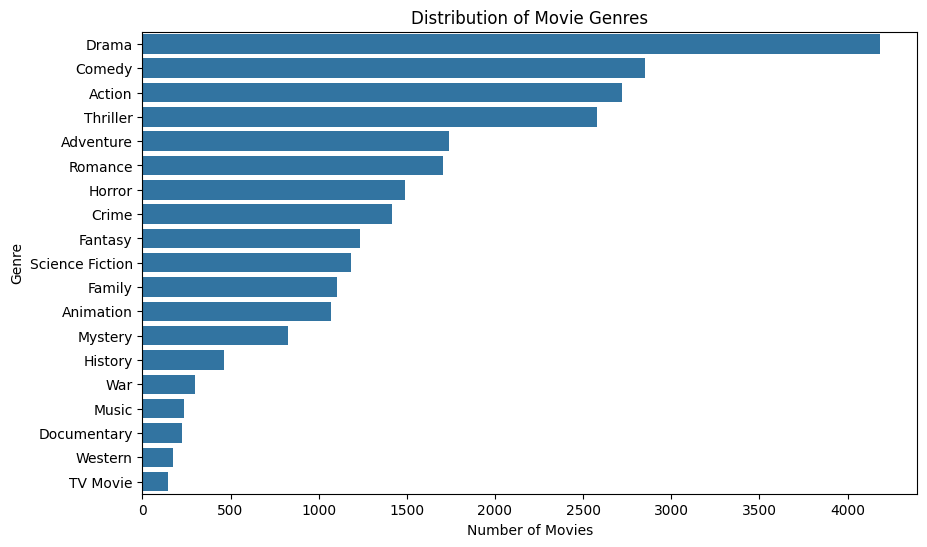

In [23]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

df['genre_list'] = df['genre'].str.split(',')
all_genres = [genre.strip() for sublist in df['genre_list'].dropna() for genre in sublist]
genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Genre', data=genre_df)
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


## Sentiment Polarity of Descriptions

This histogram illustrates the sentiment polarity of movie descriptions, computed using TextBlob.
Most descriptions cluster around neutral sentiment, which makes sense since they are factual plot summaries rather than personal reviews.


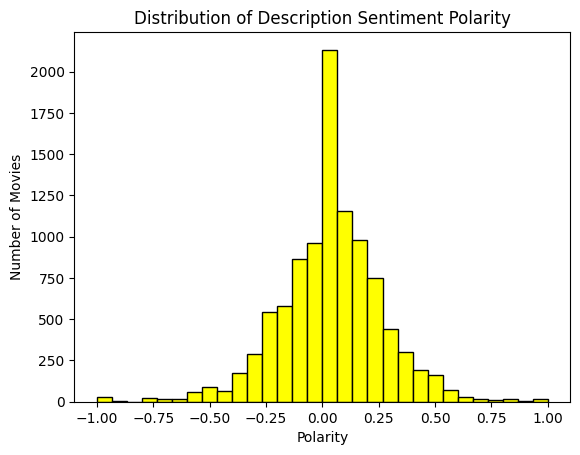

In [37]:
from textblob import TextBlob
df['polarity'] = df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.hist(df['polarity'], bins=30, color='yellow', edgecolor='black')
plt.title('Distribution of Description Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Number of Movies')
plt.show()


## Distribution of Description Lengths

This chart shows how many words each movie description contains.
The majority of descriptions are fairly short (around 10–40 words), with only a few significantly longer summaries.
Understanding description length helps in planning text modeling and feature engineering.


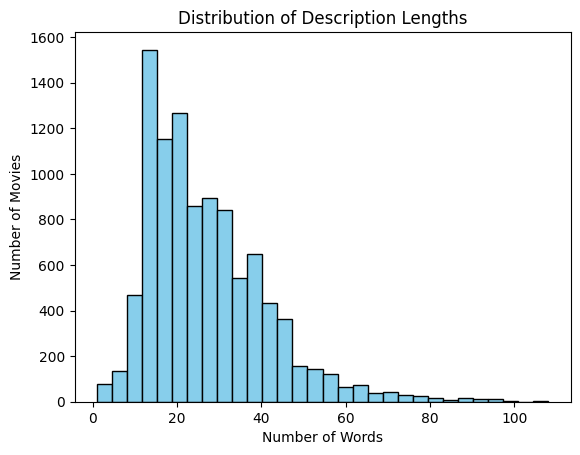

In [ ]:
df['desc_length'] = df['clean_description'].apply(lambda x: len(x.split()))
plt.hist(df['desc_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Description Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Movies')
plt.show()